In [20]:
%matplotlib inline


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from rasterio import open as r_open 
from rasterio.plot import show as r_show 
from subprocess import Popen
from rasterstats import zonal_stats


In [21]:
#working folder to Colombia
def wf(x):
    return '/Users/cecilywang/Downloads/EE508/Colombia_Hex/' + x
#biomodelos folder
def bf(x):
    return '/Users/cecilywang/Downloads/EE508/Data/Lab1/Lab1-4/BioModelos/' + x

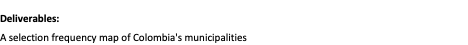


In [22]:
hexagons_shp = gpd.read_file(wf('input/Lab2_hex/colombia_hexagons.shp'))
hexagons_shp

,left,bottom,right,top,geometry
0,-79.163382,1.320001,-78.782330,1.650001,"MULTIPOLYGON (((-78.95875 1.60097, -78.95875 1..."
1,-79.163382,1.650001,-78.782330,1.980001,"MULTIPOLYGON (((-78.78764 1.80930, -78.78764 1..."
2,-78.877593,1.155001,-78.496542,1.485001,"MULTIPOLYGON (((-78.55988 1.21029, -78.56026 1..."
3,-78.877593,1.485001,-78.496542,1.815001,"MULTIPOLYGON (((-78.70431 1.77986, -78.70431 1..."
4,-78.877593,1.815001,-78.496542,2.145001,"MULTIPOLYGON (((-78.77069 1.81958, -78.77069 1..."
...,...,...,...,...,...
1105,-67.446052,3.465002,-67.065001,3.795002,"MULTIPOLYGON (((-67.44490 3.63200, -67.44046 3..."
1106,-67.160264,0.990000,-66.779213,1.320001,"POLYGON ((-66.87768 1.32000, -66.87714 1.31401..."
1107,-67.160264,1.320001,-66.779213,1.650001,"POLYGON ((-66.97825 1.65000, -66.97795 1.64949..."
1108,-67.160264,1.650001,-66.779213,1.980001,"POLYGON ((-67.08737 1.94125, -67.07870 1.92878..."


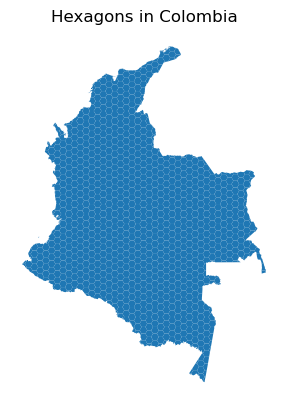

In [23]:
# Read the Municipios.shp file as a GeoDataFrame
hex = gpd.read_file(wf("input/Lab2_Hex/colombia_hexagons.shp"), encoding='utf-8')

# Plot the Municipios.shp layer
hex.plot()
plt.title("Hexagons in Colombia")
plt.axis('off')
plt.show()

the bottoms not necessary for this hexagons shp

# Filter out unwanted rows for marine areas and islands
marine_filter = mun['NOMBRE_ENT'].eq('MARINO') | mun['COD_DEPART'].isnull()
islands_filter = mun['DEPARTAMEN'].str.contains('SAN ANDRÉS') | mun['COD_DEPART'].eq('88')

# Combine the filters to identify both marine areas and islands
unwanted_filter = marine_filter | islands_filter

# Use boolean indexing to remove unwanted rows
mun = mun[~unwanted_filter]

# Plot the filtered GeoDataFrame to visualize Colombia without islands and marine areas
mun.plot(figsize=(10, 10))
plt.title("Municipios in Mainland Colombia")
plt.axis('off')  # Turn off axis labels
plt.show()


In [24]:
# Create the 'id' index directly
hex.index = pd.Index(range(1, len(hex) + 1), name='id')
hex

,left,bottom,right,top,geometry
id,,,,,
1,-79.163382,1.320001,-78.782330,1.650001,"MULTIPOLYGON (((-78.95875 1.60097, -78.95875 1..."
2,-79.163382,1.650001,-78.782330,1.980001,"MULTIPOLYGON (((-78.78764 1.80930, -78.78764 1..."
3,-78.877593,1.155001,-78.496542,1.485001,"MULTIPOLYGON (((-78.55988 1.21029, -78.56026 1..."
4,-78.877593,1.485001,-78.496542,1.815001,"MULTIPOLYGON (((-78.70431 1.77986, -78.70431 1..."
5,-78.877593,1.815001,-78.496542,2.145001,"MULTIPOLYGON (((-78.77069 1.81958, -78.77069 1..."
...,...,...,...,...,...
1106,-67.446052,3.465002,-67.065001,3.795002,"MULTIPOLYGON (((-67.44490 3.63200, -67.44046 3..."
1107,-67.160264,0.990000,-66.779213,1.320001,"POLYGON ((-66.87768 1.32000, -66.87714 1.31401..."
1108,-67.160264,1.320001,-66.779213,1.650001,"POLYGON ((-66.97825 1.65000, -66.97795 1.64949..."


In [25]:
# Calculate the area of each municipality in square kilometers (km2)
hex['km2'] = hex['geometry'].to_crs(epsg=3395).area / 1e6  # Convert from square meters to square kilometers

# Create the 'cost' column that contains the area in km2 rounded to 2 decimal places
hex['cost'] =hex['km2'].round(2)

# Create the 'status' column, assuming all planning units start at status 0
hex['status'] = 0
#making sure the first cost column is correct value
hex

,left,bottom,right,top,geometry,km2,cost,status
id,,,,,,,,
1,-79.163382,1.320001,-78.782330,1.650001,"MULTIPOLYGON (((-78.95875 1.60097, -78.95875 1...",220.695542,220.70,0
2,-79.163382,1.650001,-78.782330,1.980001,"MULTIPOLYGON (((-78.78764 1.80930, -78.78764 1...",190.672199,190.67,0
3,-78.877593,1.155001,-78.496542,1.485001,"MULTIPOLYGON (((-78.55988 1.21029, -78.56026 1...",541.273556,541.27,0
4,-78.877593,1.485001,-78.496542,1.815001,"MULTIPOLYGON (((-78.70431 1.77986, -78.70431 1...",1093.261210,1093.26,0
5,-78.877593,1.815001,-78.496542,2.145001,"MULTIPOLYGON (((-78.77069 1.81958, -78.77069 1...",353.361168,353.36,0
...,...,...,...,...,...,...,...,...
1106,-67.446052,3.465002,-67.065001,3.795002,"MULTIPOLYGON (((-67.44490 3.63200, -67.44046 3...",0.402726,0.40,0
1107,-67.160264,0.990000,-66.779213,1.320001,"POLYGON ((-66.87768 1.32000, -66.87714 1.31401...",305.107577,305.11,0
1108,-67.160264,1.320001,-66.779213,1.650001,"POLYGON ((-66.97825 1.65000, -66.97795 1.64949...",584.610744,584.61,0


In [26]:
# Save the planning unit information to 'pu.dat' in the 'mun/input' folder
hex[['cost', 'status']].to_csv('/Users/cecilywang/Downloads/EE508/Colombia_Hex/hex/input/pu.dat')



In [27]:
with open(wf('/hex/input.dat')) as file:
    print(file.read())


General Parameters
VERSION 0.1
BLM 0.001
PROP  0.5
RANDSEED -1
BESTSCORE  10
NUMREPS 50

Annealing Parameters
NUMITNS 1000000
STARTTEMP -1											
COOLFAC  6											
NUMTEMP 100000	

Cost Threshold											
COSTTHRESH  0											
THRESHPEN1  14											
THRESHPEN2  1	

Input Files											
INPUTDIR input											
SPECNAME spec.dat											
PUNAME pu.dat											
PUVSPRNAME puvspr.dat

Save Files											
SCENNAME output											
SAVERUN 3											
SAVEBEST 3											
SAVESUMMARY 3											
SAVESCEN 2											
SAVETARGMET 3											
SAVESUMSOLN 3											
SAVESOLUTIONSMATRIX 3											
SAVELOG 2											
OUTPUTDIR output

Program control.											
RUNMODE 1											
MISSLEVEL  1											
ITIMPTYPE 0											
HEURTYPE -1											
CLUMPTYPE 0											
VERBOSITY 3											
BOUNDNAME bound.dat											




In [28]:
# Save 'mun' as a shapefile to 'pulayer.shp' in the 'mun/pulayer' folder
hex[['geometry']].to_file(wf('hex/pulayer/pulayer.shp'), index=True)


we dont need to simplify hexagons since it already is simplified

In [29]:
hex_s = hex.copy()
hex_s = hex_s.to_crs(epsg=4326)
#mun_s['geometry'] = mun_s['geometry'].simplify(0.005)


In [30]:
# Save 'mun_s' to the 'temp' folder
hex_s.to_file(wf('temp/pulayer_4326_simplified.shp'))


/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

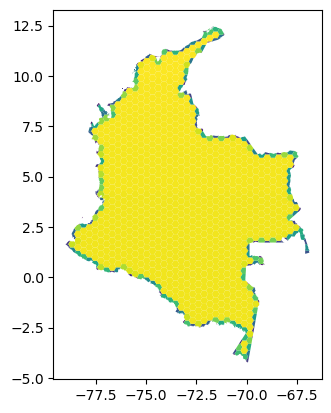

In [31]:
hex.plot('cost')

mun.plot('cost')

### Part c) create the species (conservation features)file

In [32]:

# Load the species data from 'species.csv'
sp = pd.read_csv(wf('input/Lab2_hex/species.csv'), encoding='utf-8')



In [33]:
sp['id'] = range(1, len(sp) + 1)
sp['prop'] = 0.3
sp['spf'] = 1


In [34]:
sp = sp.set_index('id')

In [35]:
sp

,name,class,category,km2,prop,spf
id,,,,,,
1,Aburria aburri,bird,NT,1.392887e+05,0.3,1
2,Aglaiocercus coelestis,bird,LC,2.953912e+04,0.3,1
3,Akodon affinis,mamm,LC,4.219484e+04,0.3,1
4,Amazilia castaneiventris,bird,EN,1.593804e+04,0.3,1
5,Amazilia viridigaster,bird,LC,4.293576e+04,0.3,1
...,...,...,...,...,...,...
234,Urochroa bougueri,bird,LC,4.020155e+04,0.3,1
235,Urosticte benjamini,bird,LC,1.737909e+04,0.3,1
236,Vampyrum spectrum,mamm,NT,5.278036e+06,0.3,1


In [36]:
#index=False to remove the column that starts with zero and just get our data that we are asking for 
sp[['prop', 'spf', 'name']].to_csv(wf('hex/input/spec.dat'))
print(sp[['prop', 'spf', 'name']])


     prop  spf                      name
id                                      
1     0.3    1            Aburria aburri
2     0.3    1    Aglaiocercus coelestis
3     0.3    1            Akodon affinis
4     0.3    1  Amazilia castaneiventris
5     0.3    1     Amazilia viridigaster
..    ...  ...                       ...
234   0.3    1         Urochroa bougueri
235   0.3    1       Urosticte benjamini
236   0.3    1         Vampyrum spectrum
237   0.3    1     Vermivora chrysoptera
238   0.3    1     Xenopipo flavicapilla

[238 rows x 3 columns]


### Part D) create the planning unit vs species file

In [37]:
# Create an empty DataFrame with columns: 'pu' and 'species'

pu_x_sp = pd.DataFrame(
    index=hex.index.rename('pu'),
    columns=sp.index.rename('species')
)


In [38]:
from rasterstats import zonal_stats

# Initialize the columns in pu_x_sp with NaN values
pu_x_sp.loc[:, :] = None

# Iterate through species data
for sp_id, sp_data in sp.iloc[:].iterrows():
    print(f"Processing species {sp_id}: {sp_data['name']}")

    # Modify the species name by replacing spaces with underscores
    species_name = sp_data['name'].replace(' ', '_')

    # Define the path to your species distribution raster
    species_raster_path = f"/Users/cecilywang/Downloads/EE508/Data/Lab1/Lab1-4/Biomodelos/{species_name}_coarse.tif"

    # Use zonal_stats to calculate the sum of values within each planning unit
    stats = zonal_stats(
        wf('temp/pulayer_4326_simplified.shp'),
        species_raster_path,
        stats="sum",
    )

    # Assign the results to the corresponding column in pu_x_sp
    pu_x_sp[sp_id] = [s['sum'] for s in stats]

Processing species 1: Aburria aburri
Processing species 2: Aglaiocercus coelestis
Processing species 3: Akodon affinis
Processing species 4: Amazilia castaneiventris
Processing species 5: Amazilia viridigaster
Processing species 6: Amazona farinosa
Processing species 7: Andigena hypoglauca
Processing species 8: Andigena laminirostris
Processing species 9: Anisognathus melanogenys
Processing species 10: Anisognathus notabilis
Processing species 11: Anthocephala floriceps
Processing species 12: Aotus lemurinus
Processing species 13: Ara ambiguus
Processing species 14: Ara militaris
Processing species 15: Ateles belzebuth
Processing species 16: Ateles fusciceps
Processing species 17: Atlapetes albofrenatus
Processing species 18: Atlapetes fuscoolivaceus
Processing species 19: Atlapetes melanocephalus
Processing species 20: Atlapetes rufinucha
Processing species 21: Aulacorhynchus sulcatus
Processing species 22: Bangsia aureocincta
Processing species 23: Bangsia edwardsi
Processing species

In [39]:
pu_x_sp

species,1,2,3,4,5,6,7,8,9,10,...,229,230,231,232,233,234,235,236,237,238
pu,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,10.998988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.443460,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.222152,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,66.999957,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,66.999957,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,121.888640,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,126.222384,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,35.886382,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.108957,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1108,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
hex

,left,bottom,right,top,geometry,km2,cost,status
id,,,,,,,,
1,-79.163382,1.320001,-78.782330,1.650001,"MULTIPOLYGON (((-78.95875 1.60097, -78.95875 1...",220.695542,220.70,0
2,-79.163382,1.650001,-78.782330,1.980001,"MULTIPOLYGON (((-78.78764 1.80930, -78.78764 1...",190.672199,190.67,0
3,-78.877593,1.155001,-78.496542,1.485001,"MULTIPOLYGON (((-78.55988 1.21029, -78.56026 1...",541.273556,541.27,0
4,-78.877593,1.485001,-78.496542,1.815001,"MULTIPOLYGON (((-78.70431 1.77986, -78.70431 1...",1093.261210,1093.26,0
5,-78.877593,1.815001,-78.496542,2.145001,"MULTIPOLYGON (((-78.77069 1.81958, -78.77069 1...",353.361168,353.36,0
...,...,...,...,...,...,...,...,...
1106,-67.446052,3.465002,-67.065001,3.795002,"MULTIPOLYGON (((-67.44490 3.63200, -67.44046 3...",0.402726,0.40,0
1107,-67.160264,0.990000,-66.779213,1.320001,"POLYGON ((-66.87768 1.32000, -66.87714 1.31401...",305.107577,305.11,0
1108,-67.160264,1.320001,-66.779213,1.650001,"POLYGON ((-66.97825 1.65000, -66.97795 1.64949...",584.610744,584.61,0


/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


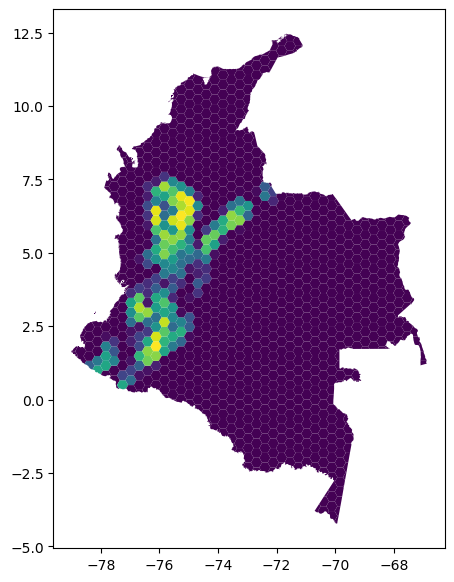

In [41]:
# Map the result

hex.join(pu_x_sp).plot(1, figsize=(7, 7))

# Save the results to a temporary CSV file
pu_x_sp.to_csv(wf('temp/pu_x_sp.csv'), index = False)

# Rename the index column to 'species' when reading the CSV file
pu_x_sp.columns = pu_x_sp.columns.rename('species')

In [42]:
puvspr = pu_x_sp.stack()


In [43]:
puvspr = pu_x_sp.stack().rename('amount').reset_index()


In [44]:
# Reorder columns in the desired order
puvspr = puvspr[['species', 'pu', 'amount']]

# Round the 'amount' column to one decimal place
puvspr['amount'] = puvspr['amount'].round(1)

# Remove rows where the 'amount' is zero -> I think this part is where I am wrong? 
puvspr = puvspr[puvspr['amount'] != 0]

# Save the DataFrame to 'mun/input/puvspr.dat'
puvspr.to_csv(wf('hex/input/puvspr.dat'), index=False)



### Part E create the boundary file

In [45]:
from matplotlib.colors import LinearSegmentedColormap

CMAP_DICT = {
    'red': [(0.0, 1.0, 1.0), (1.0, 0.0, 0.0)],
    'green': [(0.0, 1.0, 1.0), (1.0, 0.6, 0.6)],
    'blue': [(0.0, 1.0, 1.0), (1.0, 0.2, 0.2)],
}

my_cmap = LinearSegmentedColormap('', CMAP_DICT)

In [46]:
# Reproject to EPSG:21818
hex = hex.to_crs(epsg=21818)


In [47]:
bound_list = []
from itertools import combinations

# Iterate through all combinations of planning unit pairs
for id1, id2 in combinations(hex.index, 2):
    geom1 = hex.loc[id1, 'geometry']
    geom2 = hex.loc[id2, 'geometry']

    # Check if the geometries intersect
    if geom1.intersects(geom2):
        shared_boundary = geom1.intersection(geom2)

        # Check if the intersection is not empty and has a length
        if not shared_boundary.is_empty and shared_boundary.length > 0:
            # Append information to the list
            bound_list.append([id1, id2, shared_boundary.length])


In [48]:
bound = pd.DataFrame(bound_list, columns=['id', 'id2', 'boundary']).set_index('id')
bound['boundary'] = bound['boundary'].round(0)
bound

,id2,boundary
id,,
1,2,14531.0
1,3,6344.0
1,4,21140.0
2,4,19671.0
2,5,178.0
...,...,...
1102,1110,8790.0
1103,1104,4567.0
1105,1106,997.0


In [49]:
bound.to_csv(wf('hex/input/bound.dat'))



### Part F
(need to run ./marxan on terminal first

In [50]:
def run_marxan(folder):
    import os 
    marxan_command = './marxan'
    os.chdir(folder)
    return Popen(marxan_command).wait()

run_marxan(wf('hex'))


        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 3: Using Calculated Tinit = 134774 Tcool = 0.999836
Run 3 Init: Value 634647 Cost 588390 PUs 576 Connection 3.10157e+07 Missing 18 Shortfall 598.45 Penalty 15240.6 MPM 0.162225
Run 3 ThermalAnnealing: Value 312355 Cost 299143 PUs 288 Connection 1.30957e+07 Missing 4

0

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


Text(0.5, 1.0, 'Selection Frequency')

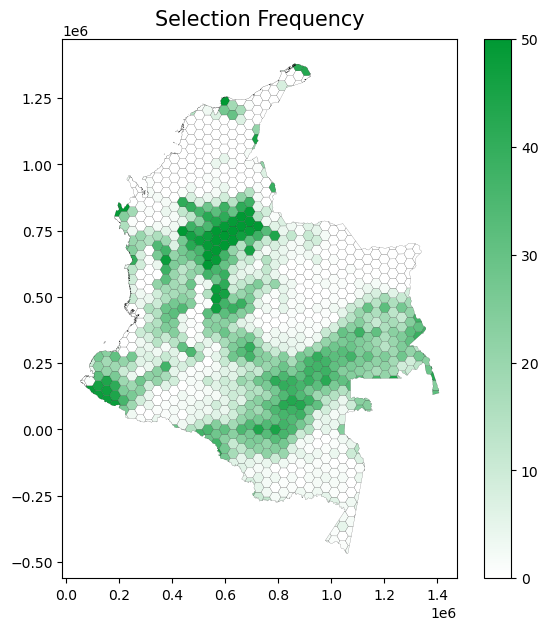

In [51]:
# Load the results
sol = pd.read_csv(wf('hex/output/output_ssoln.csv')).set_index('planning_unit')

# Create a map of the best solution
fig, ax = plt.subplots(figsize=(7, 7))
hex.join(sol).plot(
    'number',
    ax=ax,
    cmap=my_cmap,
    edgecolor='black',
    linewidth=0.1,
    legend=True
)
ax.set_title('Selection Frequency', fontsize=15, pad=10)


In [52]:


def change_marxan_parameters(filepath, change_dict):
    """
    Function to change the parameters in a Marxan parameter file

    Parameters
    ----------
    filepath : str
        Complete path of the parameter file. Usually ends with 'input.dat')
    change_dict : dict
        Dictionary of parameter values to be changed
        Example: {'BLM':0.1,'NUMREPS':100}
    """

    import os
    import re

    # Check if configuration file exists
    if not os.path.exists(filepath):
        print(filepath + ' not found')

    # Read configuration file
    with open(filepath) as file:
        old_text = file.read()

    # Copy the text, keep the old one
    new_text = old_text

    # Loop through each dictionary item
    for key, value in change_dict.items():
        # Define REGEX search pattern string
        search_regex = '\n' + key.upper() + ' +[0-9A-Za-z. -]+\n'

        # If the parameter can be found, print warning and skip to next item
        if re.search(search_regex, new_text) is None:
            print('Parameter ' + key + ' not found')
            continue

        # Define replacement string
        if type(value) == float and value < 0.001:
            value = '{0:.10f}'.format(value)
        replace_str = '\n' + key.upper() + ' ' + str(value) + '\n'

        # Replace strings
        new_text = re.sub(search_regex, replace_str, new_text)

    # If a change has been made, write the file
    if new_text != old_text:
        with open(filepath, 'w') as file:
            file.write(new_text)
            print('Saved new parameters to ' + filepath.split('/')[-1])


1e-05
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 4: Using Calculated Tinit = 121667 Tcool = 0.999851
Run 4 Init: Value 624651 Cost 615709 PUs 596 Connection 3.13814e+07 Missing 12 Shortfall 470.22 Penalty 8628.48 MPM 0.0578417
Run 4 ThermalAnnealing: Value 297753 Cost 297265

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.0001
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 5: Using Calculated Tinit = 122729 Tcool = 0.999837
Run 5 Init: Value 555873 Cost 541862 PUs 532 Connection 3.08437e+07 Missing 14 Shortfall 656.91 Penalty 10926.3 MPM 0
Run 5 ThermalAnnealing: Value 304434 Cost 302220 PUs 29

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.001
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 1: Using Calculated Tinit = 134858 Tcool = 0.999836
Run 1 Init: Value 592372 Cost 558788 PUs 546 Connection 3.1033e+07 Missing 3 Shortfall 56.3 Penalty 2551.5 MPM 0
Run 1 ThermalAnnealing: Value 314163 Cost 300098 PUs 281 Conn

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.01
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 5: Using Calculated Tinit = 254333 Tcool = 0.999853
Run 5 Init: Value 872458 Cost 541862 PUs 532 Connection 3.08437e+07 Missing 14 Shortfall 656.91 Penalty 22158.4 MPM 0
Run 5 ThermalAnnealing: Value 359439 Cost 301149 PUs 283 

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.1
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 3: Using Calculated Tinit = 1.45316e+06 Tcool = 0.999862
Run 3 Init: Value 3.84905e+06 Cost 588390 PUs 576 Connection 3.10157e+07 Missing 18 Shortfall 598.45 Penalty 159087 MPM 0.162225
Run 3 ThermalAnnealing: Value 764437 Cost 

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


1
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 4: Using Calculated Tinit = 1.34947e+07 Tcool = 0.99984
Run 4 Init: Value 3.29095e+07 Cost 615709 PUs 596 Connection 3.13814e+07 Missing 12 Shortfall 470.22 Penalty 912401 MPM 0.0578417
Run 4 ThermalAnnealing: Value 2.94537e+06 Co

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


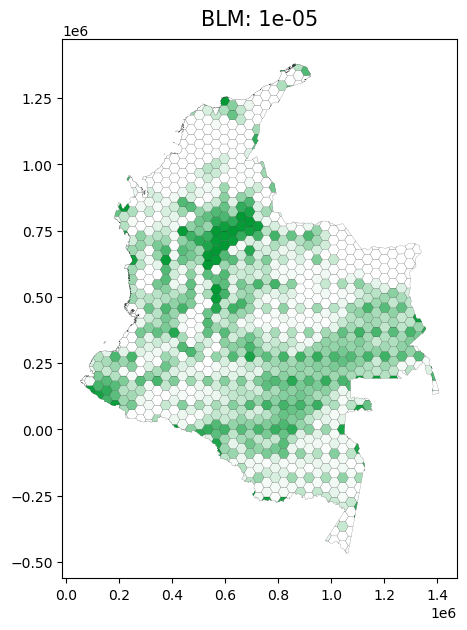

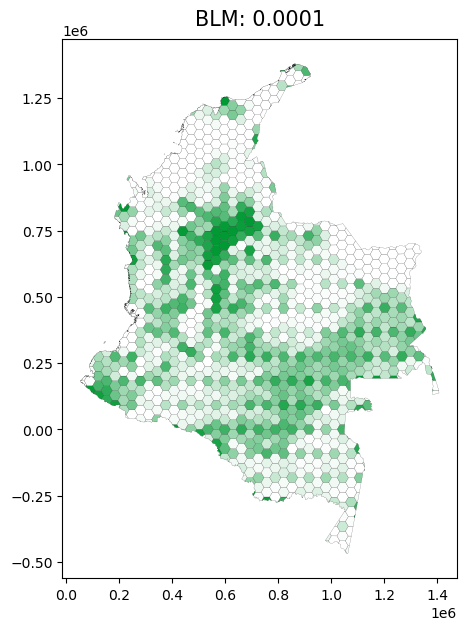

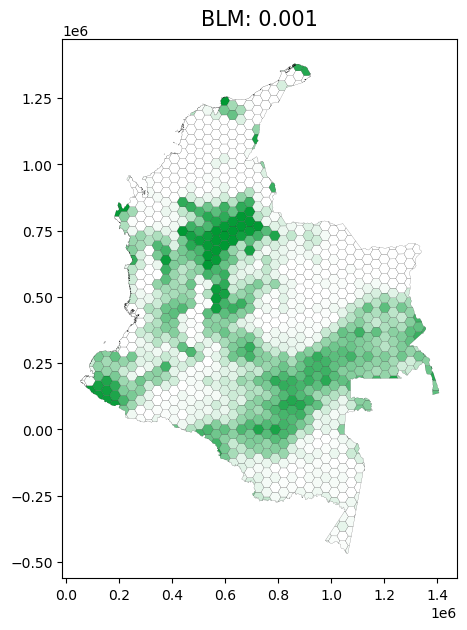

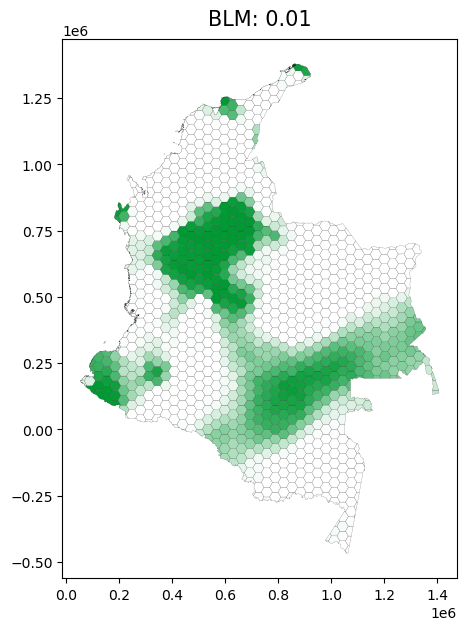

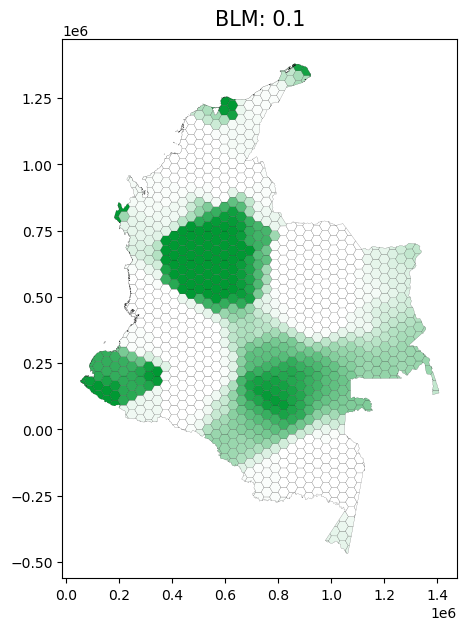

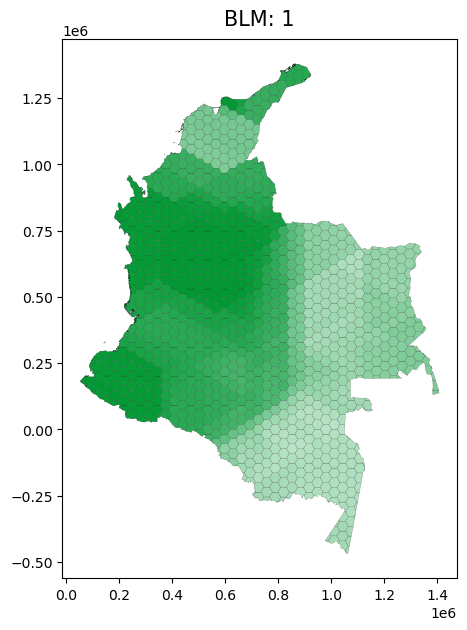

In [44]:
for blm_exp in range(-5, 1):

    blm = 10 ** blm_exp
    print(blm)
    change_marxan_parameters(
        wf('hex/input.dat'), {'BLM': blm, 'NUMREPS': 50}
    )
    run_marxan(wf('hex'))
    sol = pd.read_csv(wf('hex/output/output_ssoln.csv')).set_index('planning_unit')
    fig, ax = plt.subplots(figsize=(7, 7))
    hex.join(sol).plot(
        'number',
        ax=ax,
        cmap=my_cmap,
        edgecolor='black',
        linewidth=0.1,
    )
    ax.set_title('BLM: ' + str(blm), fontsize=15, pad=10)


### First Selection Frequency Map (BLM = 0.001)

0.001
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 8: Using Calculated Tinit = 134732 Tcool = 0.999851
Run 8 Init: Value 610157 Cost 573810 PUs 554 Connection 3.20779e+07 Missing 7 Shortfall 192.66 Penalty 4268.98 MPM 0.16604
Run 8 ThermalAnnealing: Value 312039 Cost 297852 PUs 285 Connection 1.36942e+07 Missi

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


NameError: name 'legend' is not defined

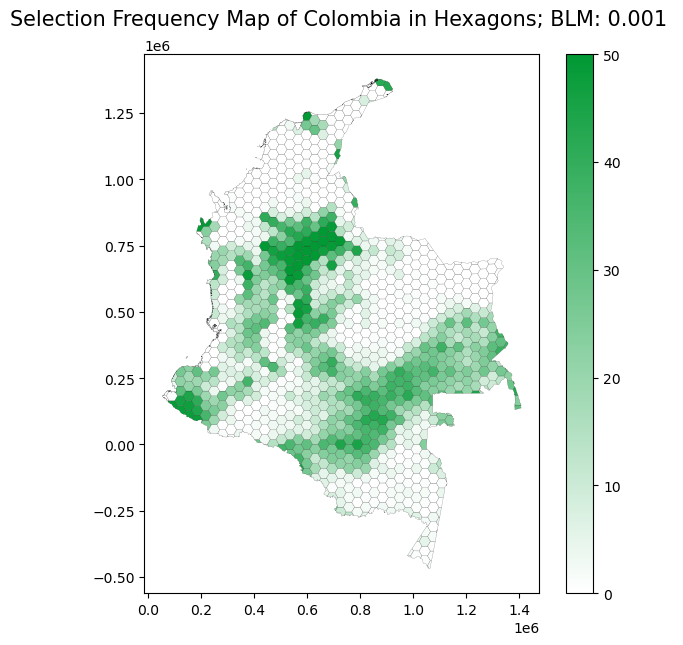

In [47]:


blm = .001
print(blm)
change_marxan_parameters(
    wf('hex/input.dat'), {'BLM': blm, 'NUMREPS': 50}
    )
run_marxan(wf('hex'))
sol = pd.read_csv(wf('hex/output/output_ssoln.csv')).set_index('planning_unit')
fig, ax = plt.subplots(figsize=(7, 7))
hex.join(sol).plot(
    'number',
    ax=ax,
    cmap=my_cmap,
    edgecolor='black',
    linewidth=0.1,
    legend=True

    )
ax.set_title('Selection Frequency Map of Colombia in Hexagons; BLM: 0.001 ', fontsize=15, pad=10)

legend.set_title('selection frequency')

#filename = '/Volumes/Class_Folders/ee_508/Students/cecilyw/Deliverables/L2/2_selection_frequency_colombia_hexagons.png'
#plt.savefig(filename,bbox_inches='tight', dpi=150)


### part G

In [53]:

travel_time_raster_path = '/Volumes/Class_Folders/ee_508/Class_Share/Data/Lab2/accessibility_to_cities_col.tif' 
hex_2 = gpd.read_file(wf('temp/pulayer_4326_simplified.shp'))

# Calculate the mean travel time for each municipality
stats = zonal_stats(hex_2, travel_time_raster_path, nodata=-9999, stats='mean')
hex_2['mean_travel_time'] = [s['mean'] for s in stats]
#cost = aread * traveltime**-.5
hex_2['cost'] = hex_2['km2'] * (hex_2['mean_travel_time'] ** (-0.5))


   


In [54]:
hex_2 = hex_2.set_index('id')

1e-05
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 7: Using Calculated Tinit = 121291 Tcool = 0.99985
Run 7 Init: Value 584665 Cost 555483 PUs 551 Connection 3.07129e+07 Missing 27 Shortfall 2491.31 Penalty 28875.3 MPM 0
Run 7 ThermalAnnealing: Value 298387 Cost 297834 PUs 291

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.0001
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 8: Using Calculated Tinit = 122831 Tcool = 0.999841
Run 8 Init: Value 580918 Cost 573810 PUs 554 Connection 3.20779e+07 Missing 7 Shortfall 192.66 Penalty 3899.61 MPM 0.16604
Run 8 ThermalAnnealing: Value 298773 Cost 296697 P

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.001
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 1: Using Calculated Tinit = 134858 Tcool = 0.999836
Run 1 Init: Value 592372 Cost 558788 PUs 546 Connection 3.1033e+07 Missing 3 Shortfall 56.3 Penalty 2551.5 MPM 0
Run 1 ThermalAnnealing: Value 314163 Cost 300098 PUs 281 Conn

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.01
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 3: Using Calculated Tinit = 254577 Tcool = 0.999853
Run 3 Init: Value 926973 Cost 588390 PUs 576 Connection 3.10157e+07 Missing 18 Shortfall 598.45 Penalty 28424.9 MPM 0.162225
Run 3 ThermalAnnealing: Value 362847 Cost 302538 P

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


0.1
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 1: Using Calculated Tinit = 1.45506e+06 Tcool = 0.999862
Run 1 Init: Value 3.68699e+06 Cost 558788 PUs 546 Connection 3.1033e+07 Missing 3 Shortfall 56.3 Penalty 24902.8 MPM 0
Run 1 ThermalAnnealing: Value 757443 Cost 355028 PUs

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


1
Saved new parameters to input.dat
        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 1: Using Calculated Tinit = 1.34525e+07 Tcool = 0.99984
Run 1 Init: Value 3.18198e+07 Cost 558788 PUs 546 Connection 3.1033e+07 Missing 3 Shortfall 56.3 Penalty 228089 MPM 0
Run 1 ThermalAnnealing: Value 2.23096e+06 Cost 741318 PU

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


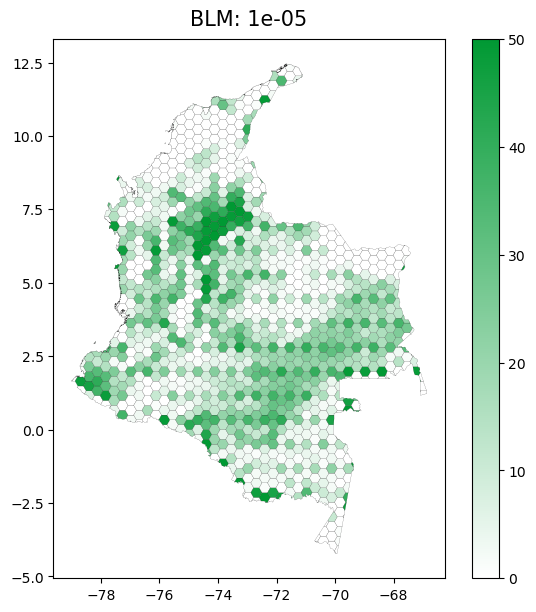

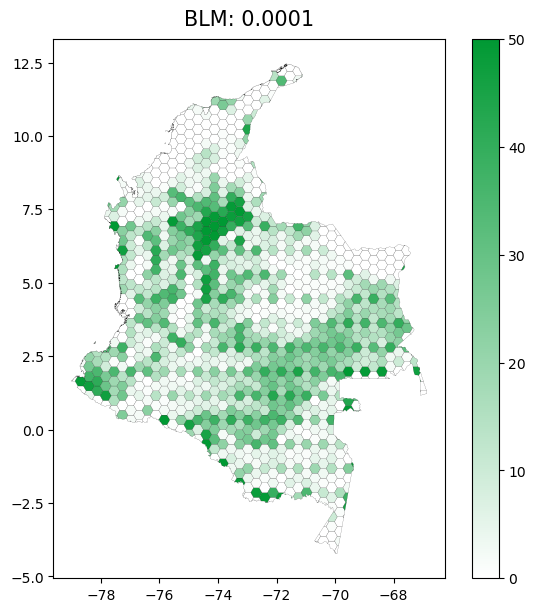

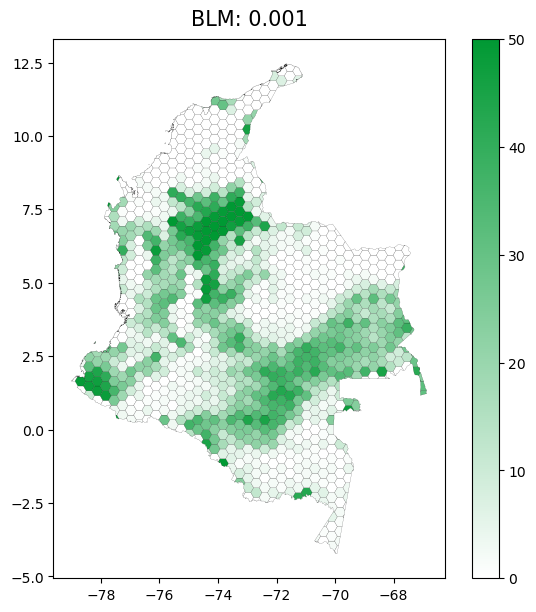

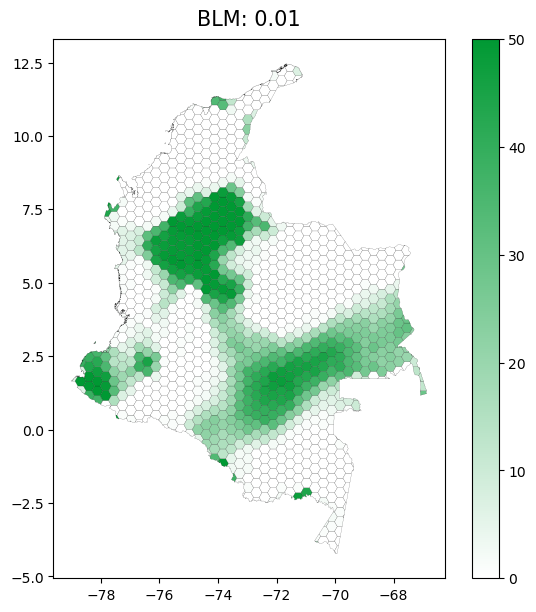

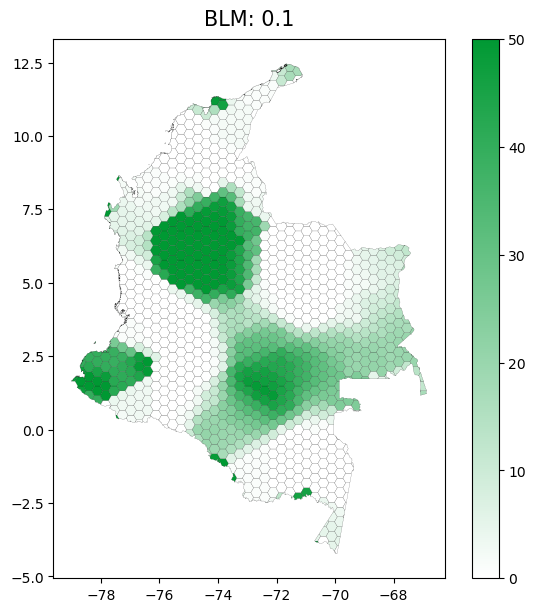

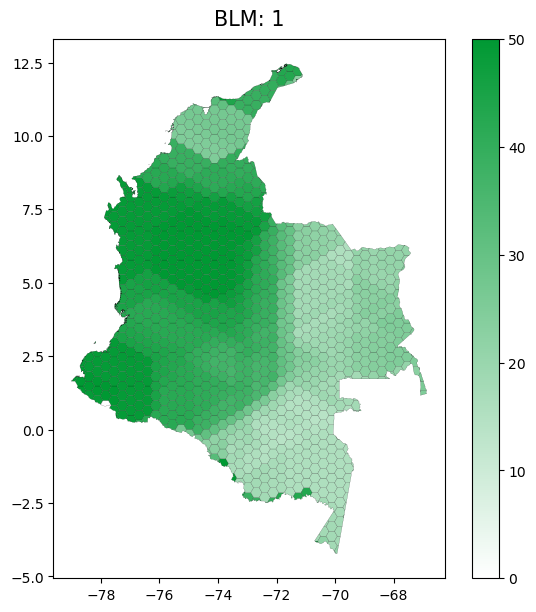

In [54]:
for blm_exp in range(-5, 1):

    blm = 10 ** blm_exp
    print(blm)
    change_marxan_parameters(
        wf('hex/input.dat'), {'BLM': blm, 'NUMREPS': 50}
    )
    run_marxan(wf('hex'))
    sol = pd.read_csv(wf('hex/output/output_ssoln.csv')).set_index('planning_unit')
    fig, ax = plt.subplots(figsize=(7, 7))
    hex_2.join(sol).plot(
        'number',
        ax=ax,
        cmap=my_cmap,
        edgecolor='black',
        linewidth=0.1,
        legend=True
    )
    ax.set_title('BLM: ' + str(blm), fontsize=15, pad=10)




In [ ]:
#CHOOSING .001 AS BLM: 


        Marxan v 4.0.6 

   Spatial Prioritization via Annealing

   Coded by Ian Ball, modified by Matthew Watts
   Written by Ian Ball and Hugh Possingham

   Marxan website

https://marxansolutions.org/


Entering in the data files 
   There are 1110 Planning units.
  1110 Planning Unit names read in 
  238 species read in 
  3080 connections entered 
31783 conservation values counted, 264180 big matrix size, 12.0308% density of matrix 
Time passed so far is 0 secs 

Pre-processing Section. 
5 species are already adequately represented.
Running multithreaded over number of threads: 8
Running multithreaded over number of threads: 8
Runs will be printed as they complete, and may not be in order due to parallelisation.

Run 1: Using Calculated Tinit = 134858 Tcool = 0.999836
Run 1 Init: Value 592372 Cost 558788 PUs 546 Connection 3.1033e+07 Missing 3 Shortfall 56.3 Penalty 2551.5 MPM 0
Run 1 ThermalAnnealing: Value 314163 Cost 300098 PUs 281 Connection 1.40104e+07 Missing 3 Shortfall 6

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


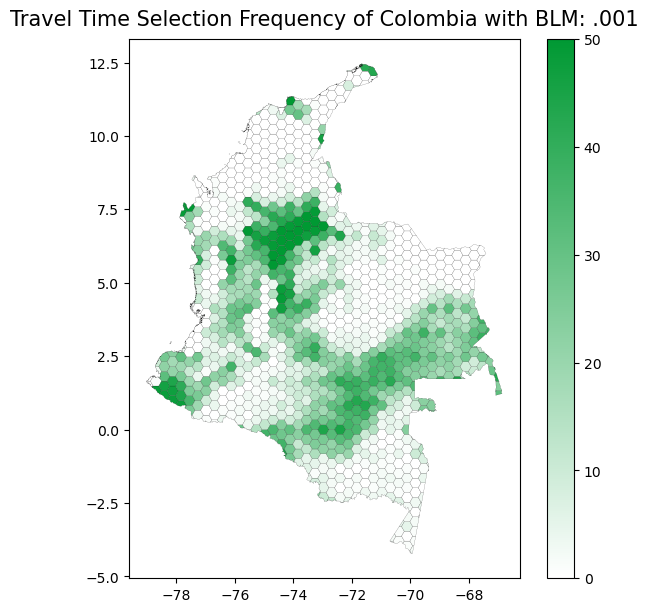

In [56]:
blm = .001

change_marxan_parameters(
wf('hex/input.dat'), {'BLM': blm, 'NUMREPS': 50}
    )
run_marxan(wf('hex'))
sol = pd.read_csv(wf('hex/output/output_ssoln.csv')).set_index('planning_unit')
fig, ax = plt.subplots(figsize=(7, 7))
hex_2.join(sol).plot(
        'number',
        ax=ax,
        cmap=my_cmap,
        edgecolor='black',
        linewidth=0.1,
        legend=True
    )
ax.set_title('Travel Time Selection Frequency of Colombia with BLM: .001', fontsize=15, pad=10)
filename = '/Volumes/Class_Folders/ee_508/Students/cecilyw/Deliverables/L2/2_travel_time_selection_frequency_colombia_hexagons.png'
plt.savefig(filename,bbox_inches='tight', dpi=150)

